In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df_train = pd.read_csv('logs/UCIHAR/train.csv', names=['round', 'cid', 'loss', 'acc', 'model_size', 
                                                'train_time', 'cyfer_time', 'decyfer_time'])
df_train['SOL'] = 'FedAvg'
df_train_hel = pd.read_csv('logs/UCIHAR/train_fhe_-2.csv', names=['round', 'cid', 'loss', 'acc', 'model_size', 
                                                'train_time', 'cyfer_time', 'decyfer_time'])
df_train_hel['SOL'] = 'FHE Last Layer'

df_train_he = pd.read_csv('logs/UCIHAR/train_fhe.csv', names=['round', 'cid', 'loss', 'acc', 'model_size', 
                                                'train_time', 'cyfer_time', 'decyfer_time'])
df_train_he['SOL'] = 'FHE'



df = pd.concat([df_train, df_train_hel, df_train_he])

In [116]:
df['time'] = df.apply(lambda x: x['train_time'] + x['cyfer_time'] + x['decyfer_time'], axis=1)

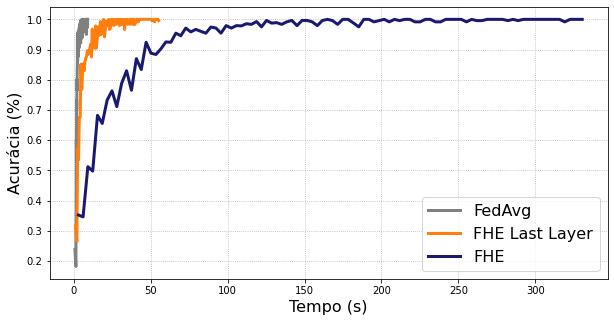

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
palette=['gray', 'tab:orange',  'midnightblue']

for idx, sol in enumerate(df['SOL'].unique()):
    df_ = df[df['SOL'] == sol].copy()
    df_.reset_index(inplace=True)
    sns.lineplot(data=df_, x=df_['time'].cumsum(), y='acc', linewidth=3, label=sol, ax=ax, color=palette[idx])  
    
ax.grid(True, linestyle=':')
ax.set_xlabel('Tempo (s)', size=16)
ax.set_ylabel('Acurácia (%)', size=16)
ax.legend(fontsize=16)


Text(0, 0.5, 'Solução')

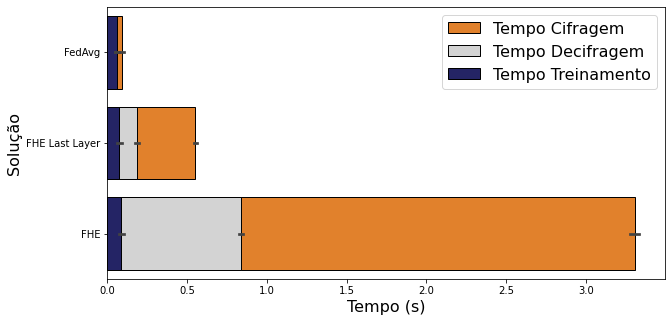

In [118]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=df, y='SOL', x=df['train_time'].values + 
                 df['decyfer_time'].values + df['cyfer_time'].values, orient='h', color='tab:orange', ec='k', label='Tempo Cifragem')
sns.barplot(data=df, y='SOL', x=df['train_time'].values + 
                 df['decyfer_time'].values, orient='h', color='lightgray', ec='k', label='Tempo Decifragem')
sns.barplot(data=df, y='SOL', x='train_time', orient='h', color='midnightblue', ec='k', label='Tempo Treinamento')

ax.set_xlabel('Tempo (s)', size=16)
ax.legend(loc='upper right', fontsize=16)
ax.set_ylabel('Solução', size=16)

Text(0.5, 0, 'Dados Transmitidos (Mbytes)')

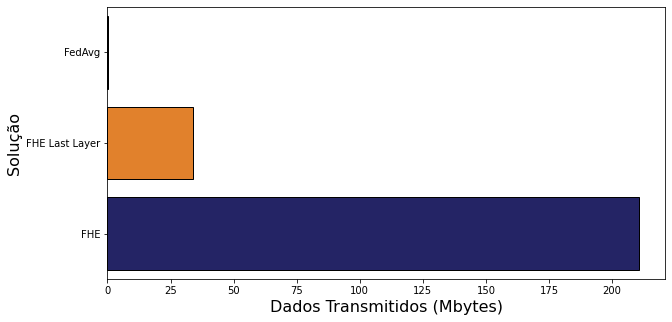

In [126]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, y='SOL', x=df['model_size']/1_000_000, orient='h', ec='k', palette=['lightgray', 'tab:orange',  'midnightblue'])    
ax.set_ylabel('Solução', size=16)
ax.set_xlabel('Dados Transmitidos (Mbytes)', size=16)

In [124]:
df.groupby('SOL').mean()

,round,cid,loss,acc,model_size,train_time,cyfer_time,decyfer_time,time
SOL,,,,,,,,,
FHE,25.5,0.5,0.273082,0.939818,2.105958e+08,0.085306,2.470090,0.750272,3.305668
FHE Last Layer,25.5,0.5,0.240976,0.939874,3.409621e+07,0.072089,0.368283,0.111185,0.551558
FedAvg,25.5,0.5,0.297069,0.913001,2.794160e+05,0.057146,0.030730,0.001200,0.089076


In [108]:
df_he = pd.read_csv('logs/UCIHAR/evaluate_fhe.csv', names=['round', 'cid', 'loss', 'acc', 'time'])
df_he['SOL'] = 'FHE'
df_ = pd.read_csv('logs/UCIHAR/evaluate.csv', names=['round', 'cid', 'loss', 'acc', 'time'])
df_['SOL'] = 'FedAvg'
df_l = pd.read_csv('logs/UCIHAR/evaluate_fhe_-2.csv', names=['round', 'cid', 'loss', 'acc', 'time'])
df_l['SOL'] = 'FHE Last Layer'

df_test = pd.concat([df_, df_he, df_l])

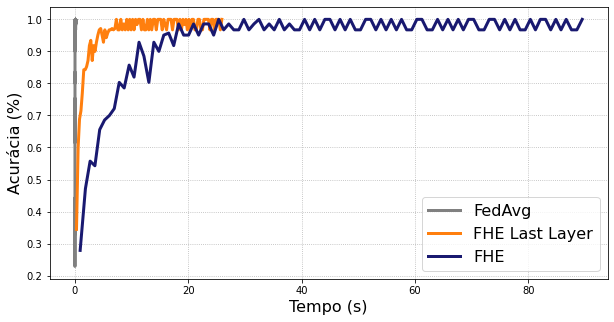

In [121]:
fig, ax = plt.subplots(figsize=(10, 5))
palette=['gray', 'tab:orange',  'midnightblue']

for idx, sol in enumerate(df['SOL'].unique()):
    df_ = df_test[df_test['SOL'] == sol].copy()
    df_.reset_index(inplace=True)
    sns.lineplot(data=df_, x=df_['time'].cumsum(), y='acc', linewidth=3, label=sol, ax=ax, color=palette[idx])  
    
ax.grid(True, linestyle=':')
ax.set_xlabel('Tempo (s)', size=16)
ax.set_ylabel('Acurácia (%)', size=16)
ax.legend(fontsize=16)
